In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('creditcard.csv')
df.head()

Saving creditcard.csv to creditcard.csv


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
#Cleaning data
print("Missing values:", df.isnull().sum())
df = df.dropna()

Missing values: Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [4]:
#Encode target variable
le = LabelEncoder()
df['Class'] = le.fit_transform(df['Class'])

#Define features and target
X = df.drop(['Class'], axis=1)
y = df['Class']

#Outlier removal using IQR method(essential for SVMs)
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
mask = ~((X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))).any(axis=1)
X = X[mask]
y = y[mask]

#Split data with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
#Reduce dimensionality for visualization using PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

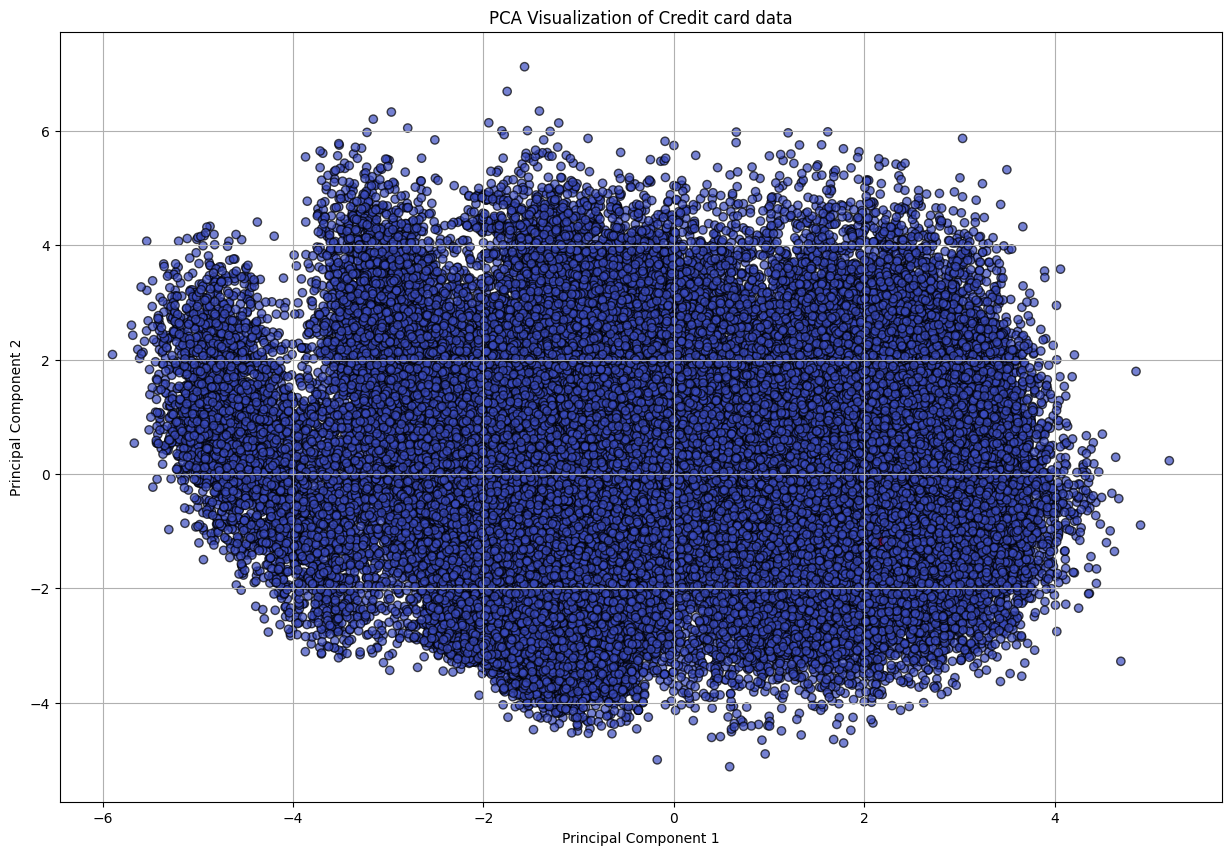

In [6]:
#PCA scatter plot (train data)
plt.figure(figsize=(15,10))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='coolwarm', edgecolors='k', alpha=0.7)
plt.title('PCA Visualization of Credit card data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

Principle componet 1(PC1) : The direction(line) that captrures the maximum variance in the data.

Principle componet 2(PC2) : Orthogonal to PC1, captures the next most variance

In [7]:
#Train SVM models
#Linear Kernel
svm_linear = SVC(kernel='linear', class_weight='balanced')
svm_linear.fit(X_train_pca, y_train)
y_pred_linear = svm_linear.predict(X_test_pca)

print("Linear Kernel Accuracy:", accuracy_score(y_test, y_pred_linear))
print("Classification Report:")
print(classification_report(y_test, y_pred_linear))

Linear Kernel Accuracy: 0.5941845764854614
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.59      0.75     29264
           1       0.00      0.33      0.00         3

    accuracy                           0.59     29267
   macro avg       0.50      0.46      0.37     29267
weighted avg       1.00      0.59      0.75     29267



In [8]:
#RBF Kernel
svm_rbf = SVC(kernel='rbf', class_weight='balanced')
svm_rbf.fit(X_train_pca, y_train)
y_pred_rbf = svm_rbf.predict(X_test_pca)

print("RBF Kernel Accuracy:", accuracy_score(y_test, y_pred_rbf))
print("Classification Report:")
print(classification_report(y_test, y_pred_rbf))

RBF Kernel Accuracy: 0.7832029247958452
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.78      0.88     29264
           1       0.00      0.00      0.00         3

    accuracy                           0.78     29267
   macro avg       0.50      0.39      0.44     29267
weighted avg       1.00      0.78      0.88     29267



In [9]:
#Polynomial Kernel
svm_poly = SVC(kernel='poly', degree=3, class_weight='balanced')
svm_poly.fit(X_train_pca, y_train)
y_pred_poly = svm_poly.predict(X_test_pca)

print("Polynomial Kernel Accuracy:", accuracy_score(y_test, y_pred_poly))
print("Classification Report:")
print(classification_report(y_test, y_pred_poly))

Polynomial Kernel Accuracy: 0.3022858509584173
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.30      0.46     29264
           1       0.00      0.67      0.00         3

    accuracy                           0.30     29267
   macro avg       0.50      0.48      0.23     29267
weighted avg       1.00      0.30      0.46     29267



In [10]:
#Evaluation function
def evaluate_model(name, y_test, y_pred):
    print(f"{name} SVM")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

#Evaluate models
evaluate_model("Linear", y_test, y_pred_linear)
evaluate_model("RBF", y_test, y_pred_rbf)
evaluate_model("Polynomial", y_test, y_pred_poly)

Linear SVM
Accuracy: 0.5941845764854614
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.59      0.75     29264
           1       0.00      0.33      0.00         3

    accuracy                           0.59     29267
   macro avg       0.50      0.46      0.37     29267
weighted avg       1.00      0.59      0.75     29267

Confusion Matrix:
 [[17389 11875]
 [    2     1]]
RBF SVM
Accuracy: 0.7832029247958452
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.78      0.88     29264
           1       0.00      0.00      0.00         3

    accuracy                           0.78     29267
   macro avg       0.50      0.39      0.44     29267
weighted avg       1.00      0.78      0.88     29267

Confusion Matrix:
 [[22922  6342]
 [    3     0]]
Polynomial SVM
Accuracy: 0.3022858509584173
Classification Report:
               precision    recall  f1-score   support